<a href="https://colab.research.google.com/github/lgvaz/faststyle/blob/master/examples/simple_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !nvidia-smi

In [ ]:
# !pip install -q git+git://github.com/fastai/fastcore.git --upgrade
# !pip install -q git+git://github.com/fastai/fastai.git --upgrade
# !pip install -q git+git://github.com/lgvaz/faststyle.git

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from faststyle import *

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = Path('/content/gdrive/My Drive/')
# save_dir = root_dir/'dl/faststyle'; save_dir.mkdir(exist_ok=True, parents=True)
# save_dir = Path('.')

In [ ]:
source = untar_data(URLs.COCO_SAMPLE)

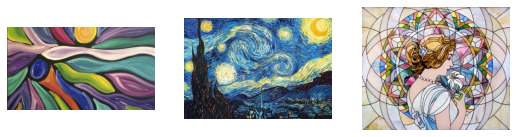

In [ ]:
# Fix styles for colab
style_dir = Path('styles')
style_fns = L('abstract.jpg', 'starry_night.jpg', 'mosaic.jpg')
style_fns = style_fns.map(lambda o: style_dir/o)
show_images([PILImage.create(fn) for fn in style_fns])

In [ ]:
dblock = DataBlock(style_blocks, get_items=get_image_files, splitter=RandomSplitter(.1),
                   item_tfms=[Resize(128)],
                   batch_tfms=[*aug_transforms(), NormalizeX.from_stats(*coco_stats)])

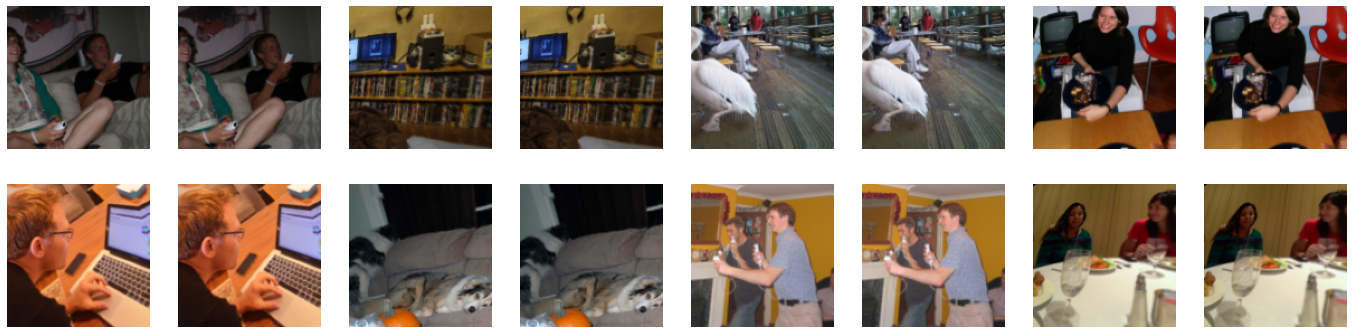

In [ ]:
dls = dblock.dataloaders(source, bs=8); dls.c = 3
dls.show_batch()

In [ ]:
get_feats = LayerFeats.from_feat_m(FeatModels.vgg19)

In [ ]:
cbs = [SaveModelCallback(), FeatsCallback.from_fns(style_fns, get_feats)]
loss_func = FastStyleLoss(stl_w=5e5, tv_w=1000)
metrics = loss_func.metrics
cfg = unet_config(blur=True, self_attention=True, norm_type=NormType.Weight, y_range=(0.,1.))
learn = unet_learner(dls=dls, arch=resnet34, loss_func=loss_func, cbs=cbs,
                     metrics=metrics, config=cfg)

In [ ]:
# learn.path = save_dir

In [ ]:
# learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3, pct_start=.9)

epoch,train_loss,valid_loss,stl,cnt,tv,time
0,58.513317,63.256111,15.115965,21.903671,26.236473,09:32


Better model found at epoch 0 with valid_loss value: 63.25611114501953.


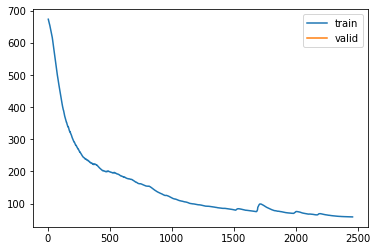

In [ ]:
learn.recorder.plot_loss()

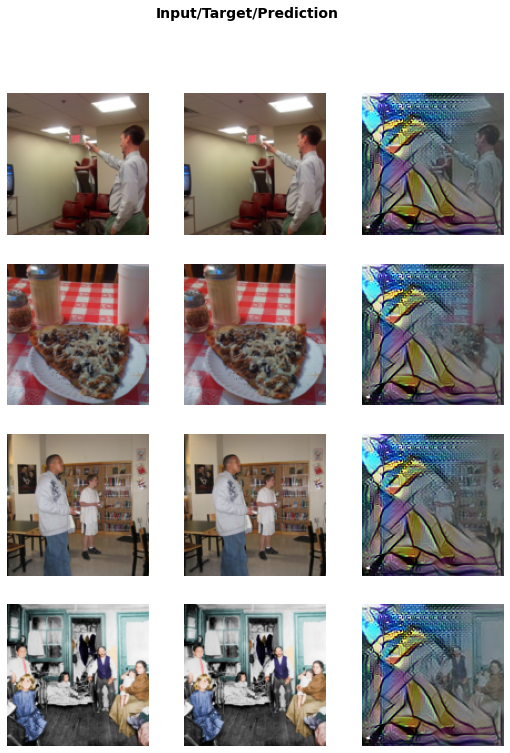

In [ ]:
learn.show_results()

In [ ]:
learn.save('unet-abstract-starry-mosaic-128')

Path('models/unet-abstract-starry-mosaic-128.pth')